# Perceptron

The perceptron is one of the simplest forms of a neural network. It's a binary classifier that maps its input `x` (a real-valued vector) to an output value `f(x)` (a single binary value).

## Theory

A perceptron takes several binary inputs, `x1, x2, ...`, and produces a single binary output:
$$
 f(x) = \begin{cases} 
1 & \text{if } w \cdot x + b > 0 \\
0 & \text{otherwise} 
\end{cases}
$$

Where:
- `w` is a vector of real-valued weights
- `b` is the bias, a real number
- `w · x` is the dot product, which sums up the products of their corresponding components

## Implementation

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_function
        self.weights: np.array = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)

        y = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_func(linear_output)
        return y_pred
    
    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

## Testing the Perceptron Model

In [7]:
# Sample data: OR gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X, y)
predictions = p.predict(X)

print("Predictions:", predictions)

Predictions: [0 1 1 1]


The perceptron should be able to model the OR gate correctly, predicting the correct outputs for the given inputs.

## Conclusion

The perceptron is a foundational building block for more complex neural networks. While it has limitations (e.g., it can't model XOR without modification), understanding its workings is crucial for diving deeper into neural networks.

# Neural Networks

## Mathematical Representation of a Neural Network

A neural network is composed of layers of interconnected nodes or neurons. Each connection between neurons has an associated weight, and each neuron has an associated bias. The output of each neuron is computed as a weighted sum of its inputs, passed through an activation function.

### Single Neuron (Perceptron)

For a single neuron:

$$
\begin{align}
z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
\end{align}
$$

Where:
- $ x_1, x_2, ... x_n $ are the input values.
- $ w_1, w_2, ... w_n $ are the weights.
- $ b $ is the bias.

The output $ y $ of the neuron is then:

$$
\begin{align}
y = f(z)
\end{align}
$$

Where $ f $ is the activation function (e.g., sigmoid, tanh, ReLU).

### Layer of Neurons

For a layer of neurons, the above equations can be represented in matrix form:

$$
\begin{align}
Z = XW + B
\end{align}
$$

Where:
- $ X $ is the input matrix (each row is a sample, each column is a feature).
- $ W $ is the weight matrix.
- $ B $ is the bias matrix.
- $ Z $ is the matrix of weighted sums for each neuron and each sample.

The output matrix $ Y $ for the layer is:

$$
\begin{align}
Y = f(Z)
\end{align}
$$

Where $ f $ is applied element-wise.

### Deep Neural Network

For a deep neural network with multiple layers, the output of one layer becomes the input to the next:

$$
\begin{align}
Y^{[1]} = f(Z^{[1]})
\end{align}
$$

$$
\begin{align}
Y^{[2]} = f(Z^{[2]})
\end{align}
$$

\[ ... \]

$$
\begin{align}
Y^{[L]} = f(Z^{[L]})
\end{align}
$$

Where:
- $ Y^{[l]} $ is the output of the $ l^{th} $ layer.
- $Z^{[l]} $ is the weighted sum matrix for the $ l^{th} $ layer.
- $ L $ is the number of layers in the network.

### Backpropagation

Training a neural network involves adjusting the weights and biases to minimize the difference between the predicted output and the actual target values. This is typically done using gradient descent, where the gradients are computed using the chain rule of calculus. This process is called backpropagation.

For a given loss function $ L $, the goal is to compute:

$$
\begin{align}
\frac{\partial L}{\partial W^{[l]}}
\end{align}
$$

$$
\begin{align}
\frac{\partial L}{\partial B^{[l]}}
\end{align}
$$

For all layers $ l $, and update the weights and biases accordingly.

---

### Algorithm
Certainly! Backpropagation is a method used to calculate the gradient of the loss function with respect to each weight by using the chain rule of calculus. Here's a breakdown of the backpropagation mathematics for a simple feedforward neural network:

Notation:
L: Loss function.
a [l] : Activations in layer 
z [l] : Weighted sum in layer l before activation.
w [l] : Weights for layer 
b [l] : Biases for layer 
g [l] : Activation function for layer 
δ [l] : Error term for layer 

### Forward Propogation
For each layer 
Compute the weighted sum:
$$
\begin{align}
z^{[l]} = a^{[l-1]} w^{[l]} + b^{[l]}
\end{align}
$$
2. Apply the activation function:
$$
\begin{align}
a^{[l]} = g^{[l]}(z^{[l]})
\end{align}
$$
### Backward Propagation:
For the output layer:
Compute the error term:
$$
\begin{align}
\delta^{[L]} = (a^{[L]} - y) \odot g'^{[L]}(z^{[L]})
\end{align}
$$
Where $ \odot $ denotes element-wise multiplication and $ g'^{[L]} $ is the derivative of the activation function.
For each hidden layer $ l $ (starting from $ L-1 $ down to 1):
Compute the error term:
$$
\begin{align}
\delta^{[l]} = (\delta^{[l+1]} w^{[l+1]T}) \odot g'^{[l]}(z^{[l]})
\end{align}
$$
### Gradient Computation:
For each layer $ l $:
Compute the gradient for the weights:
$$
\begin{align}
\frac{\partial L}{\partial w^{[l]}} = a^{[l-1]T} \delta^{[l]}
\end{align}
$$
Compute the gradient for the biases:
$$
\begin{align}
\frac{\partial L}{\partial b^{[l]}} = \sum_{i} \delta^{[l](i)}
\end{align}
$$
Where the sum is over all training examples.
### Weight and Bias Update:
Using the computed gradients, update the weights and biases (typically using gradient descent or its variants):
$$
\begin{align}
w^{[l]} &= w^{[l]} - \alpha \frac{\partial L}{\partial w^{[l]}} \\
b^{[l]} &= b^{[l]} - \alpha \frac{\partial L}{\partial b^{[l]}}
\end{align}
$$
Where $ \alpha $ is the learning rate.
---



This is a high-level overview of the mathematical representation of a neural network. Each component, especially the backpropagation algorithm, has deeper mathematical intricacies that can be explored further in specialized texts or courses.
## From Scratch using Pandas and Numpy

Consider this arch


![workflow](https://www.researchgate.net/publication/323312622/figure/fig3/AS:645600408256513@1530934540411/Workflow-diagram-of-the-artificial-neural-network-algorithm-developed-by-Lancashire-et.png)


In [28]:
import numpy as np
import pandas as pd

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_hidden_input= np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # forward propogation
            f = self.forward_prop(X)
            hidden_layer_output = f[1]
            output = f[0]


            # backpropogation
            error = y - output 
            d_output = error * self.sigmoid_derivative(output)
            d_output = d_output.reshape(-1, 1)

            error_hidden_layer = np.dot(d_output, self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_layer_output)

            # uupdate weidhts and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
            self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
            self.weights_hidden_input += X.T.dot(d_hidden_layer) * learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis = 0, keepdims=True) * learning_rate
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    def predict(self, X):
        return self.forward_prop(X)[0]

    def forward_prop(self, X):
        hidden_layer_input = np.dot(X, self.weights_hidden_input) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output = self.sigmoid(output_layer_input)
        return [output, hidden_layer_output]

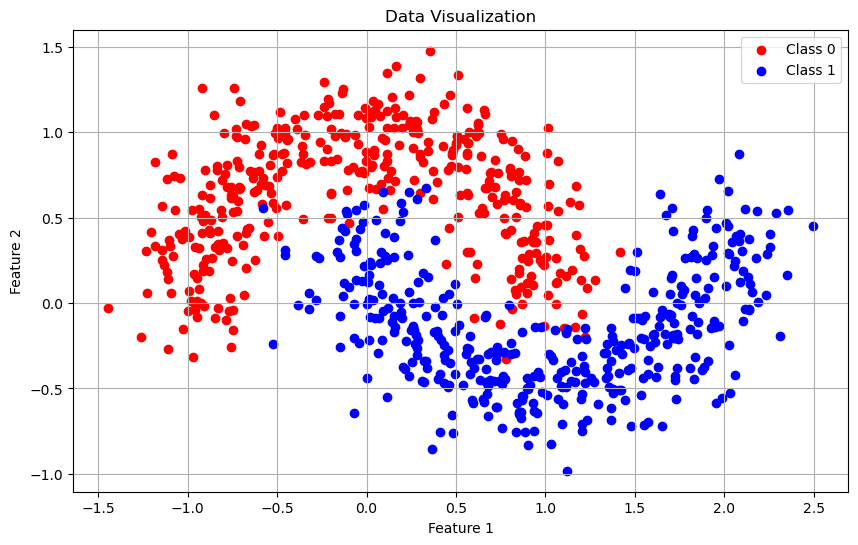

In [34]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='blue', label='Class 1')
plt.title('Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [30]:
# Convert data to numpy arrays
X_train_np, X_test_np = np.array(X_train), np.array(X_test)
y_train_np, y_test_np = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

# Initialize and train the model
nn_from_scratch = NeuralNetwork(input_size=2, hidden_size=5, output_size=1)
nn_from_scratch.fit(X_train_np, y_train_np, epochs=5000, learning_rate=0.01)

# Predict on test data
predictions_from_scratch = nn_from_scratch.predict(X_test_np)
predictions_from_scratch = (predictions_from_scratch > 0.5).astype(int)

# Calculate accuracy
accuracy_from_scratch = np.mean(predictions_from_scratch == y_test_np)
print(f"Accuracy (From Scratch): {accuracy_from_scratch * 100:.2f}%")

Epoch 1/5000, Loss: 0.2853143038277754
Epoch 101/5000, Loss: 0.09086771964232711
Epoch 201/5000, Loss: 0.08693911367165896
Epoch 301/5000, Loss: 0.07642738713296614
Epoch 401/5000, Loss: 0.06340848697491362
Epoch 501/5000, Loss: 0.05357957695012892
Epoch 601/5000, Loss: 0.04703841896188484
Epoch 701/5000, Loss: 0.042580204436724806
Epoch 801/5000, Loss: 0.03927363254291758
Epoch 901/5000, Loss: 0.03654024777348774
Epoch 1001/5000, Loss: 0.034160812094456094
Epoch 1101/5000, Loss: 0.032165722219649376
Epoch 1201/5000, Loss: 0.03056607452291591
Epoch 1301/5000, Loss: 0.029300993176472813
Epoch 1401/5000, Loss: 0.02829514358330222
Epoch 1501/5000, Loss: 0.027485014879530097
Epoch 1601/5000, Loss: 0.026822276637758692
Epoch 1701/5000, Loss: 0.02627121770739013
Epoch 1801/5000, Loss: 0.025805603215683773
Epoch 1901/5000, Loss: 0.025406097580433124
Epoch 2001/5000, Loss: 0.025058352020471592
Epoch 2101/5000, Loss: 0.024751636144163706
Epoch 2201/5000, Loss: 0.02447787452111477
Epoch 2301/500

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

class PyTorchNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

def train(model, X, y, epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
                loss_value = torch.mean((y - outputs) ** 2).item()
                print(f'Epoch {epoch}/{epochs}, Loss: {loss_value}')

def predict(model, X):
    with torch.no_grad():
        predicts = model(X)
    return predicts

In [40]:
# Convert data to PyTorch tensors
X_train_torch, X_test_torch = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
y_train_torch, y_test_torch = torch.FloatTensor(y_train).view(-1, 1), torch.FloatTensor(y_test).view(-1, 1)

# Initialize and train the model
nn_pytorch = PyTorchNN(input_size=2, hidden_size=5, output_size=1)
train(nn_pytorch, X_train_torch, y_train_torch, epochs=5000, learning_rate=0.01)

# Predict on test data
predictions_pytorch = predict(nn_pytorch, X_test_torch)
predictions_pytorch = (predictions_pytorch > 0.5).float()

# Calculate accuracy
accuracy_pytorch = torch.mean((predictions_pytorch == y_test_torch).float()).item()
print(f"Accuracy (PyTorch): {accuracy_pytorch * 100:.2f}%")

Epoch 0/5000, Loss: 0.23925451934337616
Epoch 100/5000, Loss: 0.1230526715517044
Epoch 200/5000, Loss: 0.0948183536529541
Epoch 300/5000, Loss: 0.09184793382883072
Epoch 400/5000, Loss: 0.09154185652732849
Epoch 500/5000, Loss: 0.09148655831813812
Epoch 600/5000, Loss: 0.09141772985458374
Epoch 700/5000, Loss: 0.0913248285651207
Epoch 800/5000, Loss: 0.09124153107404709
Epoch 900/5000, Loss: 0.09116186946630478
Epoch 1000/5000, Loss: 0.0910714641213417
Epoch 1100/5000, Loss: 0.09087508171796799
Epoch 1200/5000, Loss: 0.0886007696390152
Epoch 1300/5000, Loss: 0.0793040320277214
Epoch 1400/5000, Loss: 0.04509685933589935
Epoch 1500/5000, Loss: 0.03238449618220329
Epoch 1600/5000, Loss: 0.02808666229248047
Epoch 1700/5000, Loss: 0.025922829285264015
Epoch 1800/5000, Loss: 0.024628791958093643
Epoch 1900/5000, Loss: 0.023799646645784378
Epoch 2000/5000, Loss: 0.023241113871335983
Epoch 2100/5000, Loss: 0.022846383973956108
Epoch 2200/5000, Loss: 0.022554831579327583
Epoch 2300/5000, Loss: 